In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
%matplotlib inline 

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/IMDB%20Data/movie_metadata.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [8]:
data.drop(["actor_1_facebook_likes","duration","actor_3_facebook_likes",
           "gross","genres","actor_1_name","facenumber_in_poster",
           'plot_keywords','title_year',"movie_imdb_link",'actor_2_facebook_likes','num_user_for_reviews'],axis=1,inplace=True)

In [9]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_2_name               5030 non-null   object 
 5   movie_title                5043 non-null   object 
 6   num_voted_users            5043 non-null   int64  
 7   cast_total_facebook_likes  5043 non-null   int64  
 8   actor_3_name               5020 non-null   object 
 9   language                   5031 non-null   object 
 10  country                    5038 non-null   object 
 11  content_rating             4740 non-null   object 
 12  budget                     4551 non-null   float64
 13  imdb_score                 5043 non-null   float

,color,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,language,country,content_rating,budget,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,0.0,Joel David Moore,Avatar,886204,4834,Wes Studi,English,USA,PG-13,237000000.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,563.0,Orlando Bloom,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,English,USA,PG-13,300000000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,0.0,Rory Kinnear,Spectre,275868,11700,Stephanie Sigman,English,UK,PG-13,245000000.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,22000.0,Christian Bale,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,English,USA,PG-13,250000000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,131.0,Rob Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,NaN,NaN,NaN,NaN,7.1,NaN,0


In [10]:
data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
director_facebook_likes      104
actor_2_name                  13
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
language                      12
country                        5
content_rating               303
budget                       492
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [11]:
data['color']=data['color'].fillna("color")
data.replace({"actor_2_name":np.NaN,
              "actor_3_name":np.NaN,
              "country":np.NaN,
             "content_rating":np.NaN},value="None",inplace=True)
data.replace({'director_facebook_likes':np.NaN},value=0.0,inplace=True)
data.replace({'director_name':np.NaN},value="None",inplace=True)
data['num_critic_for_reviews']=data['num_critic_for_reviews'].fillna(value=data['num_critic_for_reviews'].mean())
data["aspect_ratio"]=data['aspect_ratio'].fillna(method='ffill')
data.drop(data.index[4],inplace=True)
data.head(100)

,color,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,language,country,content_rating,budget,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,0.0,Joel David Moore,Avatar,886204,4834,Wes Studi,English,USA,PG-13,237000000.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,563.0,Orlando Bloom,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,English,USA,PG-13,300000000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,0.0,Rory Kinnear,Spectre,275868,11700,Stephanie Sigman,English,UK,PG-13,245000000.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,22000.0,Christian Bale,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,English,USA,PG-13,250000000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,475.0,Samantha Morton,John Carter,212204,1873,Polly Walker,English,USA,PG-13,263700000.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Color,Christopher Nolan,712.0,22000.0,Anne Hathaway,Interstellar,928227,31488,Mackenzie Foy,English,USA,PG-13,165000000.0,8.6,2.35,349000
97,Color,Christopher Nolan,642.0,22000.0,Tom Hardy,Inception,1468200,81115,Joseph Gordon-Levitt,English,USA,PG-13,160000000.0,8.8,2.35,175000
98,Color,Hideaki Anno,1.0,28.0,Shin'ya Tsukamoto,Godzilla Resurgence,374,699,Atsuko Maeda,Japanese,Japan,None,NaN,8.2,2.35,0
99,Color,Peter Jackson,645.0,0.0,Adam Brown,The Hobbit: An Unexpected Journey,637246,9152,James Nesbitt,English,USA,PG-13,180000000.0,7.9,2.35,166000


<AxesSubplot:>

<Figure size 1800x800 with 0 Axes>

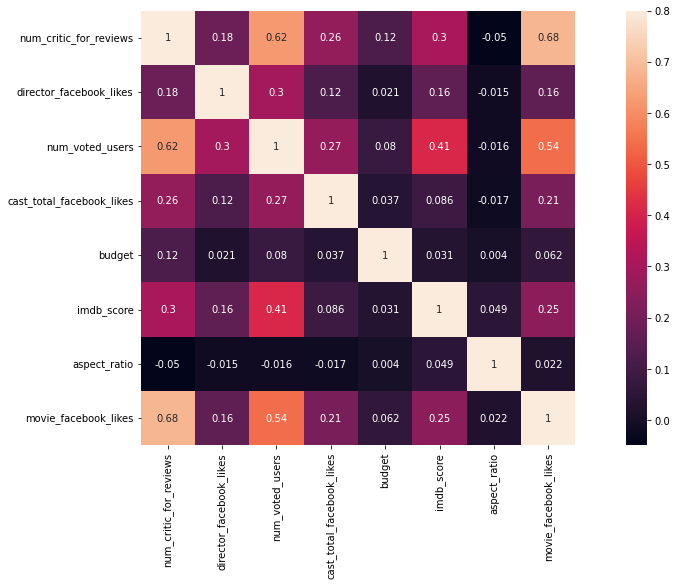

In [12]:
plt.figure(figsize=(18,8),dpi=100,)
plt.subplots(figsize=(18,8))
sns.heatmap(data=data.corr(),square=True,vmax=0.8,annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu=7527.46 and sigma=19320.15
 


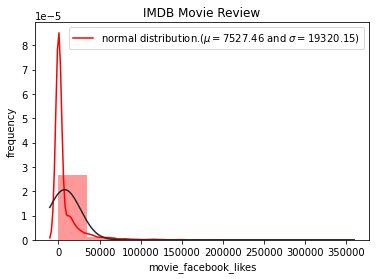

In [13]:
from scipy.stats import norm
sns.distplot(a=data['movie_facebook_likes'],hist=True,bins=10,fit=norm,color="red")
plt.title("IMDB Movie Review")
plt.ylabel("frequency")
mu,sigma=norm.fit(data['movie_facebook_likes'])
print("\n mu={:.2f} and sigma={:.2f}\n ".format(mu,sigma))
plt.legend(["normal distribution.($\mu=${:.2f} and $\sigma=${:.2f})".format(mu,sigma)])
plt.show()

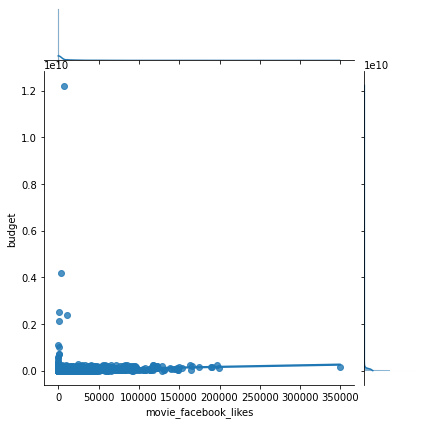

In [14]:
sns.jointplot(x=data['movie_facebook_likes'],y=data['budget'],kind="reg",dropna=True)

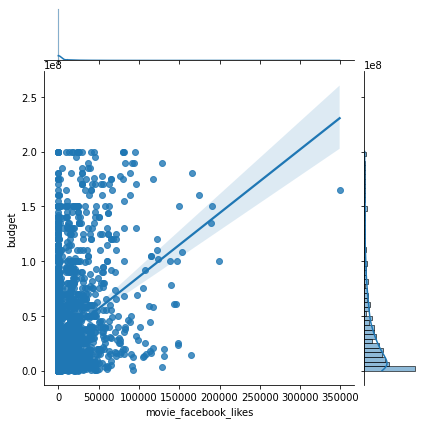

In [15]:
data=data.drop(data[(data['budget']>200000000.0)].index).reset_index(drop=True)
sns.jointplot(x=data['movie_facebook_likes'],y=data['budget'],kind="reg",dropna=True)

In [16]:
data['budget']=data['budget'].fillna(data['budget'].mean())
data.head(10)

,color,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,language,country,content_rating,budget,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,Marc Forster,403.0,395.0,Mathieu Amalric,Quantum of Solace,330784,2023,Rory Kinnear,English,UK,PG-13,200000000.0,6.7,2.35,0
1,Color,Ridley Scott,343.0,0.0,William Hurt,Robin Hood,211765,3244,Scott Grimes,English,USA,PG-13,200000000.0,6.7,2.35,17000
2,Color,Chris Weitz,251.0,129.0,Eva Green,The Golden Compass,149019,24106,Kristin Scott Thomas,English,USA,PG-13,180000000.0,6.1,2.35,0
3,Color,James Cameron,315.0,0.0,Kate Winslet,Titanic,793059,45223,Gloria Stuart,English,USA,PG-13,200000000.0,7.7,2.35,26000
4,Color,Colin Trevorrow,644.0,365.0,Judy Greer,Jurassic World,418214,8458,Omar Sy,English,USA,PG-13,150000000.0,7.0,2.00,150000
5,Color,Sam Mendes,750.0,0.0,Helen McCrory,Skyfall,522030,2039,Rory Kinnear,English,UK,PG-13,200000000.0,7.8,2.35,80000
6,Color,Sam Raimi,300.0,0.0,James Franco,Spider-Man 2,411164,43388,Kirsten Dunst,English,USA,PG-13,200000000.0,7.3,2.35,0
7,Color,Shane Black,608.0,1000.0,Jon Favreau,Iron Man 3,557489,30426,Don Cheadle,English,USA,PG-13,200000000.0,7.2,2.35,95000
8,Color,Tim Burton,451.0,13000.0,Alan Rickman,Alice in Wonderland,306320,79957,Anne Hathaway,English,USA,PG,200000000.0,6.5,1.85,24000
9,Color,Dan Scanlon,376.0,37.0,Tyler Labine,Monsters University,235025,14863,Sean Hayes,English,USA,G,200000000.0,7.3,1.85,44000


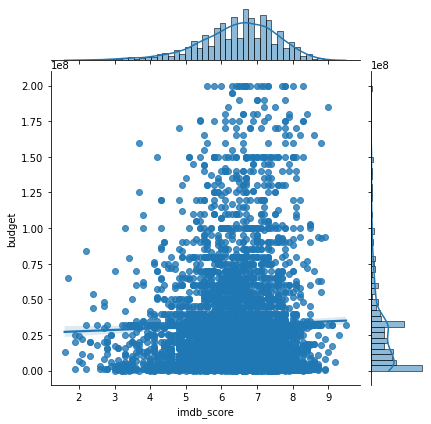

In [17]:
sns.jointplot(x=data['imdb_score'],y=data['budget'],kind="reg")

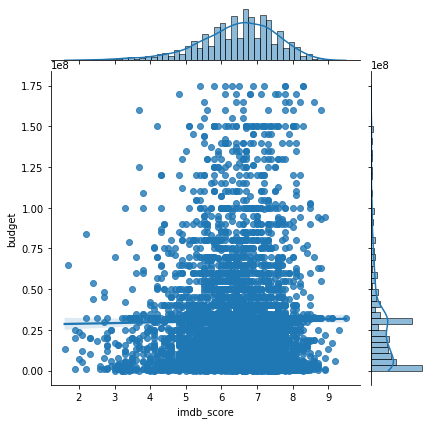

In [18]:
data=data.drop(data[(data['budget']>175000000.0)].index).reset_index(drop=True)
sns.jointplot(x=data['imdb_score'],y=data['budget'],kind="reg" )

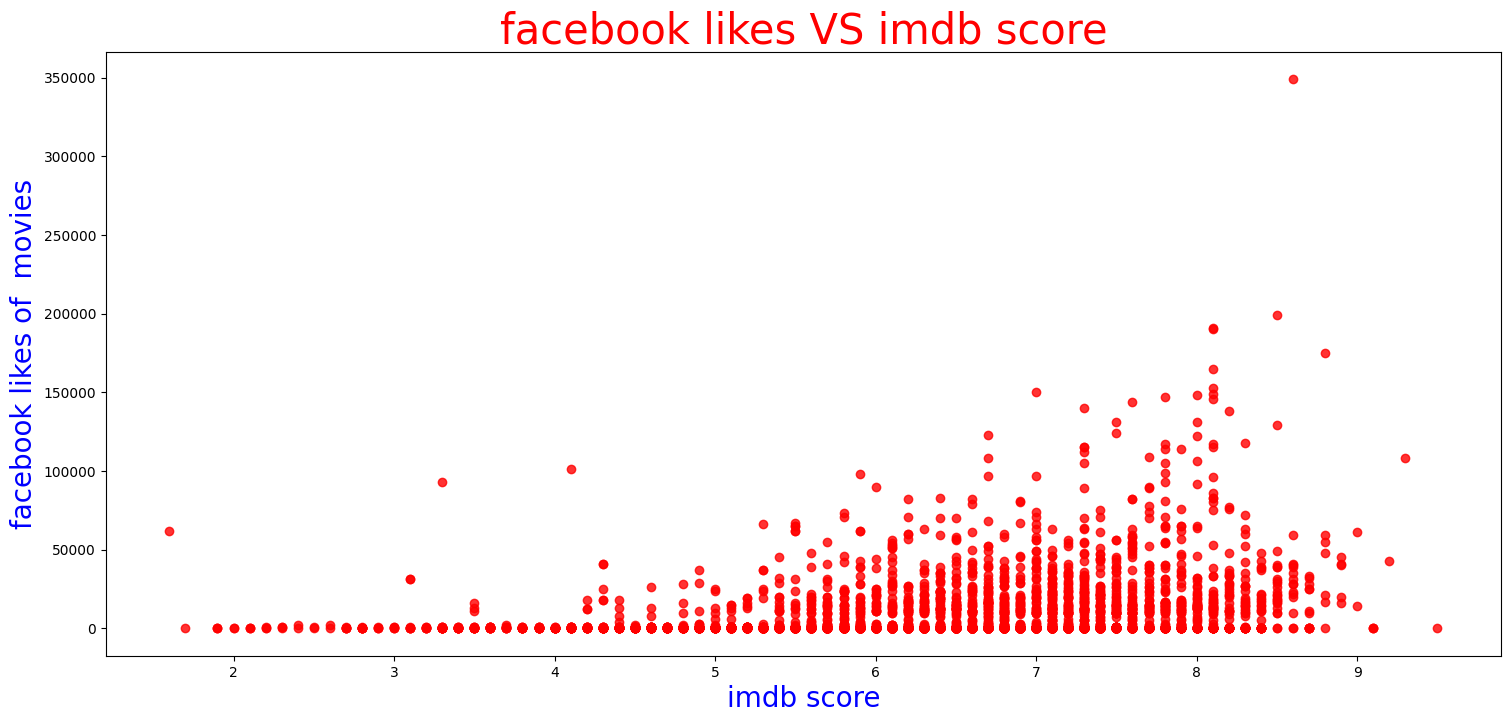

In [19]:
plt.figure(figsize=(18,8),dpi=100,)
plt.scatter(x=data['imdb_score'],y=data['movie_facebook_likes'],alpha=0.8,color="red")
plt.ylabel("facebook likes of  movies",color="blue",size=20)
plt.xlabel("imdb score",color="blue",size=20)
plt.title("facebook likes VS imdb score",color="red",size=30);

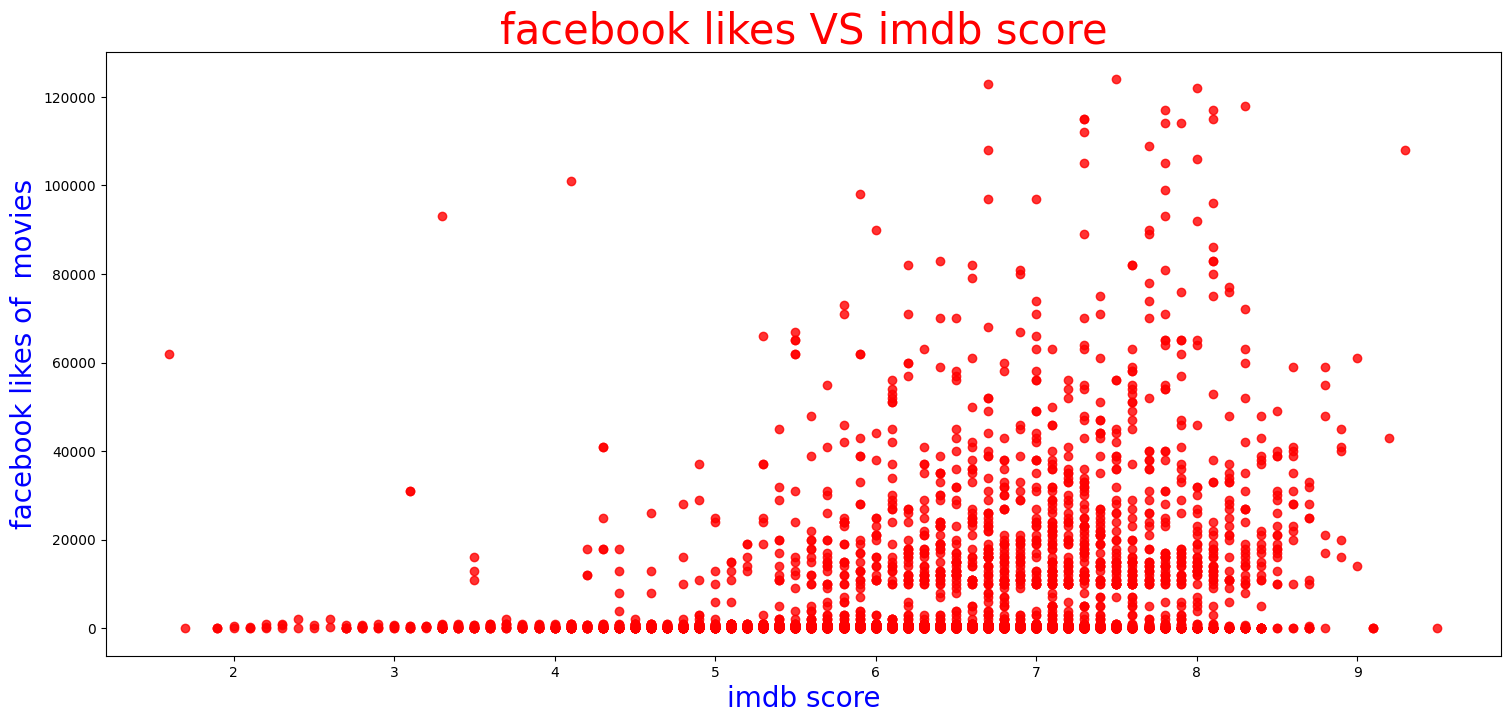

In [20]:
data=data.drop(data[(data['movie_facebook_likes']>125000)].index).reset_index(drop=True)
plt.figure(figsize=(18,8),dpi=100,)
plt.scatter(x=data['imdb_score'],y=data['movie_facebook_likes'],alpha=0.8,color="red")
plt.ylabel("facebook likes of  movies",color="blue",size=20)
plt.xlabel("imdb score",color="blue",size=20)
plt.title("facebook likes VS imdb score",color="red",size=30);

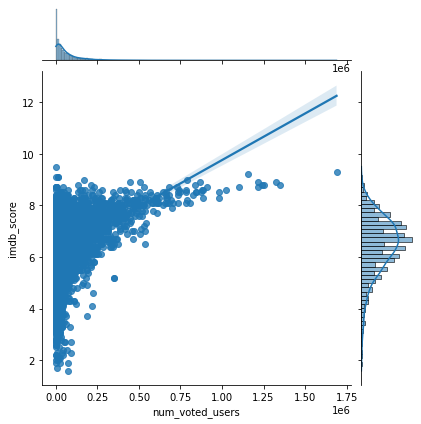

In [21]:
sns.jointplot(x=data['num_voted_users'],y=data['imdb_score'],kind='reg')

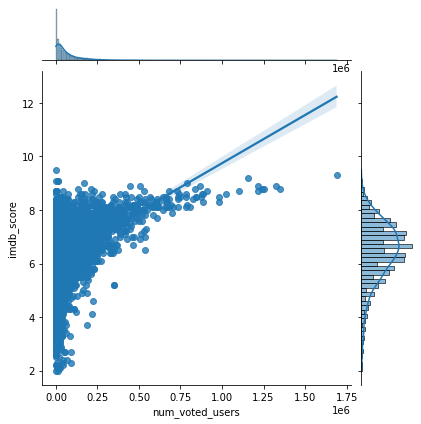

In [22]:
data=data.drop(data[(data['imdb_score']<2)].index).reset_index(drop=True)
sns.jointplot(x=data['num_voted_users'],y=data['imdb_score'],kind='reg')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu=6384.88 and sigma=15082.74
 


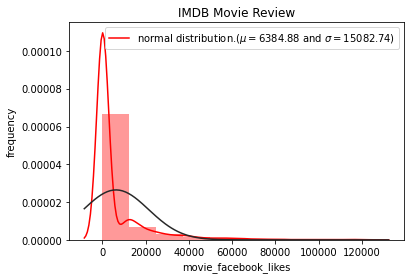

In [23]:
from scipy.stats import norm
sns.distplot(a=data['movie_facebook_likes'],hist=True,bins=10,fit=norm,color="red")
plt.title("IMDB Movie Review")
plt.ylabel("frequency")
mu,sigma=norm.fit(data['movie_facebook_likes'])
print("\n mu={:.2f} and sigma={:.2f}\n ".format(mu,sigma))
plt.legend(["normal distribution.($\mu=${:.2f} and $\sigma=${:.2f})".format(mu,sigma)])
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encode=LabelEncoder()
data['color'] = encode.fit_transform(data['color'] ) 
data['director_name'] = encode.fit_transform(data['director_name'] ) 
data['actor_2_name'] = encode.fit_transform(data['actor_2_name'] ) 
data['movie_title'] = encode.fit_transform(data['movie_title'] ) 
data['country'] = encode.fit_transform(data['country'] ) 
data['content_rating'] = encode.fit_transform(data['content_rating'] ) 
data['actor_3_name'] = encode.fit_transform(data['actor_3_name'] )
data['num_voted_users'] = encode.fit_transform(data['num_voted_users'] )
X=data.iloc[:,0:16].values
X=X[:,1:]
X.shape

(4929, 15)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4929 entries, 0 to 4928
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4929 non-null   int64  
 1   director_name              4929 non-null   int64  
 2   num_critic_for_reviews     4929 non-null   float64
 3   director_facebook_likes    4929 non-null   float64
 4   actor_2_name               4929 non-null   int64  
 5   movie_title                4929 non-null   int64  
 6   num_voted_users            4929 non-null   int64  
 7   cast_total_facebook_likes  4929 non-null   int64  
 8   actor_3_name               4929 non-null   int64  
 9   language                   4918 non-null   object 
 10  country                    4929 non-null   int64  
 11  content_rating             4929 non-null   int64  
 12  budget                     4929 non-null   float64
 13  imdb_score                 4929 non-null   float

In [26]:
y=data.iloc[:,-1].values
y.shape

(4929,)

In [27]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(categories='auto')
onehotencoder.fit_transform(X).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
X_train

array([[134, 140.1942719807731, 2.0, ..., 7.8, 1.37, 4],
       [457, 134.0, 0.0, ..., 8.2, 1.85, 21000],
       [852, 72.0, 17.0, ..., 6.1, 1.85, 543],
       ...,
       [1754, 432.0, 38.0, ..., 7.1, 2.35, 46000],
       [167, 208.0, 188.0, ..., 6.1, 1.85, 2000],
       [1442, 101.0, 73.0, ..., 6.6, 1.85, 934]], dtype=object)